# Matplotlib

使用起来和matlab的画图很像, 用过matlab可以很快的适应.

## 快速尝试

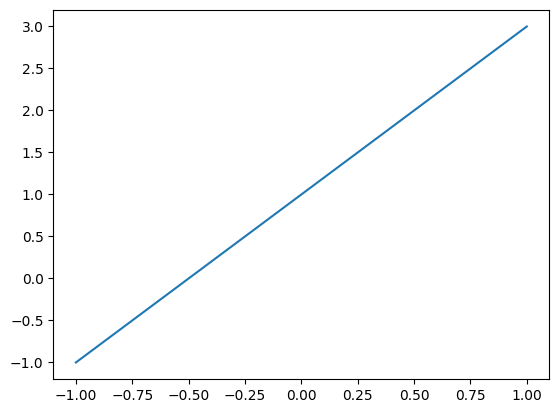

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 50)
y = 2 * x + 1

plt.figure()  # figure定义一片画布
plt.plot(x, y)  # 绘制图形
plt.show()  # 让画布显示出来


## 线条装饰

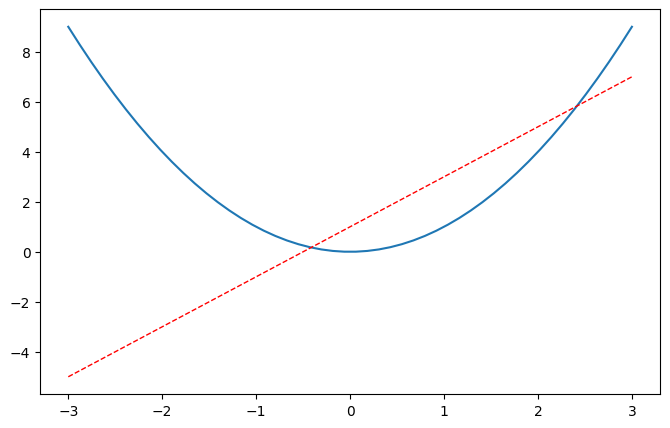

In [4]:
x = np.linspace(-3, 3, 50)
y1 = 2 * x + 1
y2 = x**2

# 定义一片画布,编号3,大小(8,5)
plt.figure(num=3, figsize=(8, 5))
plt.plot(x, y2)
# 绘制y1,颜色red,线宽1.0, 线条样式虚线
# 线条样式 supported values are
# '-', '--', '-.', ':',
# 'solid', 'dashed', 'dashdot', 'dotted'
# 'None', ' ', '',
plt.plot(x, y1, color="red", linewidth=1.0, linestyle="dashed")
plt.show()


## 坐标轴装饰

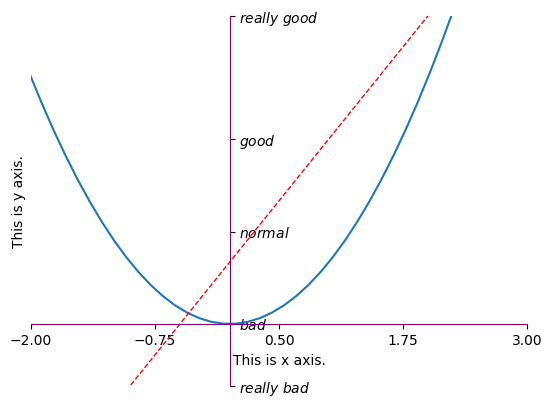

In [5]:
x = np.linspace(-3, 3, 50)
y1 = 2 * x + 1
y2 = x**2

# 创建画布
plt.figure()
# 绘制图形
plt.plot(x, y2)
plt.plot(x, y1, color="red", linewidth=1.0, linestyle="--")

# xlim和ylim可以设置坐标轴的显示范围
plt.xlim((-2, 3))
plt.ylim((-1, 5))
# xlabel和ylabel可以设置坐标轴的名称
plt.xlabel("This is x axis.")
plt.ylabel("This is y axis.")
# xticks和yticks可以调整坐标轴的刻度
new_x_ticks = np.linspace(-2, 3, 5)
new_y_ticks = [-1, 0, 1.5, 3, 5]
new_y_labels = [r"$really\ bad$", r"$bad$", r"$normal$", r"$good$", r"$really\ good$"]
plt.xticks(new_x_ticks)
plt.yticks(new_y_ticks, new_y_labels)
# 使用plt.gca获取当前坐标轴信息
ax = plt.gca()
# ax.spines设置边框 .set_color设置颜色
ax.spines["right"].set_color("purple")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color("none")
ax.spines["bottom"].set_color("purple")
# 设置刻度显示位置
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("right")
# 设置边框位置, 可用参数(data axes outward)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["right"].set_position(("data", 0))
# 显示画布
plt.show()


## 图例

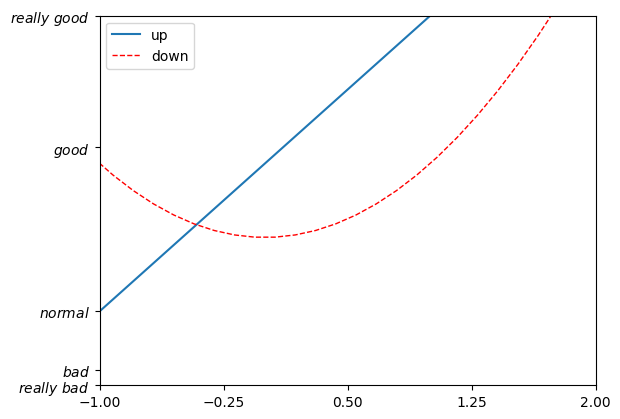

In [6]:
x = np.linspace(-3, 3, 50)
y1 = 2 * x + 1
y2 = x**2

plt.figure()
# set x limits
plt.xlim((-1, 2))
plt.ylim((-2, 3))
# set new sticks
plt.xticks(np.linspace(-1, 2, 5))
# set tick labels
plt.yticks(
    [-2, -1.8, -1, 1.22, 3],
    [r"$really\ bad$", r"$bad$", r"$normal$", r"$good$", r"$really\ good$"],
)
# set line syles
# 并且获取线条对象,注意返回的是列表
(l1,) = plt.plot(x, y1, label="linear line")
(l2,) = plt.plot(x, y2, color="red", linewidth=1.0, linestyle="--", label="square line")
#
#
#
# 使用legend来显示图例 loc参数如下
#  'best' : 0,
#  'upper right'  : 1,
#  'upper left'   : 2,
#  'lower left'   : 3,
#  'lower right'  : 4,
#  'right'        : 5,
#  'center left'  : 6,
#  'center right' : 7,
#  'lower center' : 8,
#  'upper center' : 9,
#  'center'       : 10,

# plt.legend(loc="upper right")

# 除了使用第17-18行所述的label
# 也可以自己定义不同线条对应的label
plt.legend(handles=[l1, l2], labels=["up", "down"], loc="best")

plt.show()


## 标注

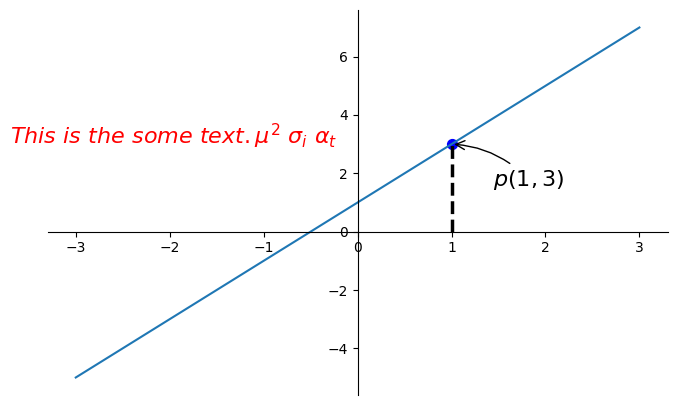

In [7]:
x = np.linspace(-3, 3, 50)
y = 2 * x + 1

plt.figure(num=1, figsize=(8, 5))
plt.plot(x, y)

ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


p = Point(1, 3)

# 标注出点p的位置信息
plt.plot([p.x, p.x],[0, p.y],'k--',linewidth=2.5)
plt.scatter([p.x,], [p.y,], s=50, color='b')

# 其中参数xycoords='data' 是说基于数据的值来选位置, 
# xytext=(+30, -30) 和 textcoords='offset points' 
# 对于标注位置的描述 和 xy 偏差值, 
# arrowprops是对图中箭头类型的一些设置.
plt.annotate(r'$p(1, 3)$', xy=(p.x, p.y),
             xycoords='data', xytext=(+30,-30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3,rad=.2'))

# 其中-3.7, 3,是选取text的位置, 
# 空格需要用到转字符\,fontdict设置文本字体.
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text. \mu^2\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'})


plt.show()

## 散点图

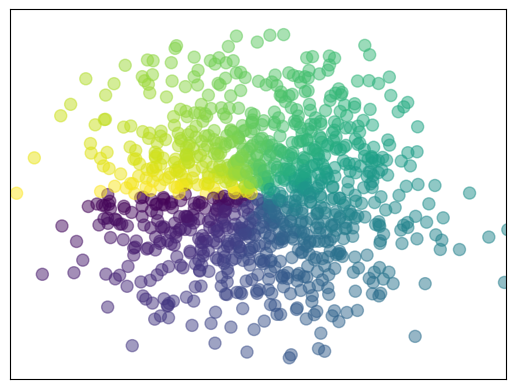

In [8]:
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value


plt.figure()
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-3, 3)
plt.xticks(())  # ignore xticks
plt.ylim(-3, 3)
plt.yticks(())  # ignore yticks

plt.show()


首先，先引入matplotlib.pyplot简写作plt,再引入模块numpy用来产生一些随机数据。生成1024个呈标准正态分布的二维数据组 (平均数是0，方差为1) 作为一个数据集，并图像化这个数据集。每一个点的颜色值用T来表示.

输入X和Y作为location，size=75，颜色为T，color map用默认值，透明度alpha 为 50%。 x轴显示范围定位(-1.5，1.5)，并用xtick()函数来隐藏x坐标轴，y轴同理：

## 柱状图

向上向下分别生成12个数据，X为 0 到 11 的整数 ，Y是相应的均匀分布的随机数据。 使用的函数是plt.bar，参数为X和Y.

用facecolor设置主体颜色，edgecolor设置边框颜色为白色，接下来我们用函数plt.text分别在柱体上方（下方）加上数值，用%.2f保留两位小数，横向居中对齐ha='center'，纵向底部（顶部）对齐va='bottom'.

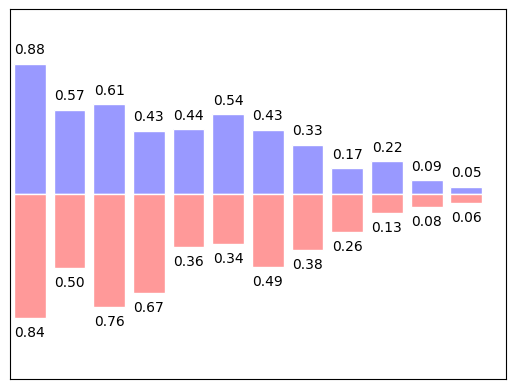

In [9]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.show()

## 等高线图

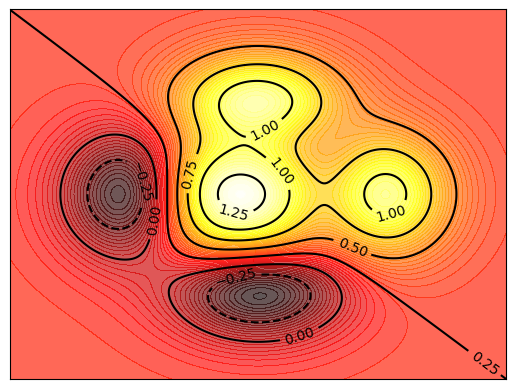

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 数据集即三维点 (x,y) 和对应的高度值，共有256个点。
# 高度值使用一个 height function f(x,y) 生成。 
# x, y 分别是在区间 [-3,3] 中均匀分布的256个值，
# 并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，
# 编织成栅格:

def f(x,y):
    # the height function
    return 0.25 + (1 - (x-0.1) / 2 + x**5 + y**5) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

# 接下来进行颜色填充。
# 使用函数plt.contourf把颜色加进去，
# 位置参数分别为：X, Y, f(X,Y)。透明度0.75，
# 并将 f(X,Y) 的值对应到color map的暖色组中寻找对应颜色。

# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 66, alpha=.66, cmap=plt.cm.hot)

# 接下来进行等高线绘制。使
# 用plt.contour函数划线。位置参数为：X, Y, f(X,Y)。
# 颜色选黑色
# 现在的结果如下图所示，只有颜色和线条，还没有数值Label：

# # use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 8, colors='k')

# 其中，8代表等高线的密集程度，
# 这里被分为10个部分。
# 如果是0，则图像被一分为二。
# 最后加入Label，inline控制是否将Label画在线里面，
# 字体大小为10。并将坐标轴隐藏：
plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

plt.show()

## 3D图形

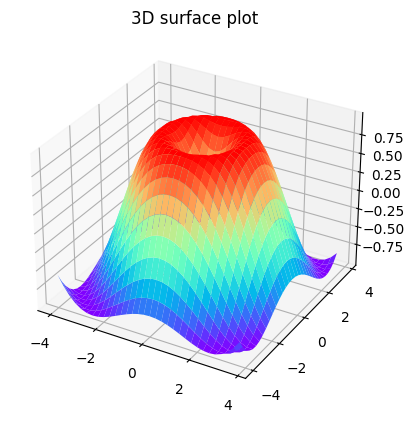

In [30]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
# 创建3d绘图区域
ax = plt.axes(projection="3d")
# 从三个维度构建
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
# height value
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
# 调用创建三维线图
ax.plot_surface(X, Y, Z, 
                rstride=1, cstride=1, 
                cmap=plt.get_cmap('rainbow'))
ax.set_title("3D surface plot")
plt.show()
